In [1]:
from joblib import dump, load
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lines = load('./line_cache/lines_cache.joblib')

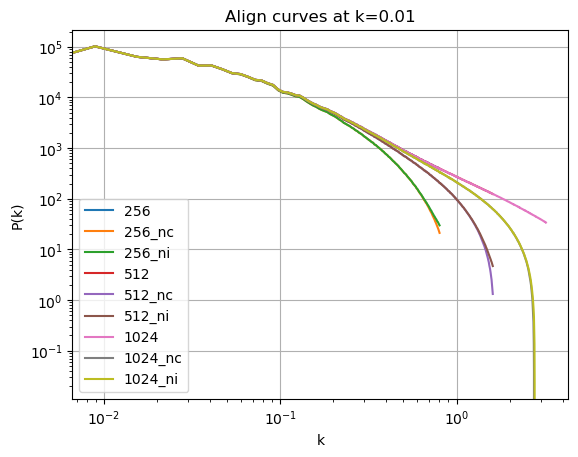

In [3]:
target_k = 0.01

_, k_ref, P_ref = lines[0]
idx_ref = np.argmin(np.abs(k_ref - target_k))
P_ref_value = P_ref[idx_ref]

plt.figure()
for name, k_arr, P_arr in lines:
    idx = np.argmin(np.abs(k_arr - target_k))
    factor = P_ref_value / P_arr[idx]
    P_aligned = P_arr * factor
    # ls = '--' if 'nc' in name else ':' if 'ni' in name else '-.'
    # marker = '|' if '256' in name else 'x' if '512' in name else '+'
    plt.loglog(k_arr, P_aligned, linestyle='-', label=name)

# for i, (k_i, P_i) in enumerate(lines):
#     idx_i = np.argmin(np.abs(k_i - target_k))
#     P_i_value = P_i[idx_i]
#     factor = P_ref_value / P_i_value
#     P_i_aligned = P_i * factor
#     plt.loglog(k_i, P_i_aligned, label=f'Line {i+1} aligned')



plt.grid()
plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('Align curves at k=0.01')
plt.legend()
plt.show()

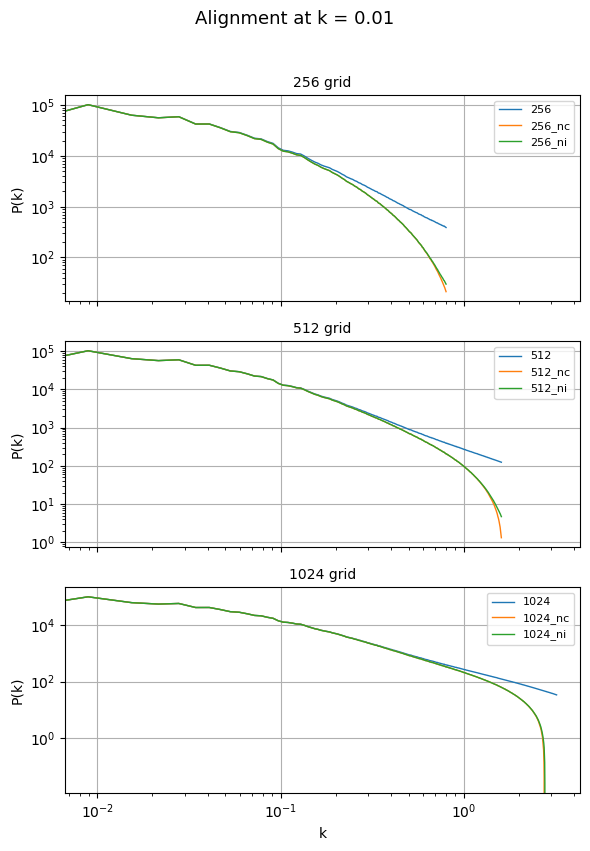

In [4]:
fig, axes = plt.subplots(3, 1, figsize=(6, 9), sharex=True)
mapping = {'256': 0, '512': 1, '1024': 2}
markers = {'256': '|', '512': 'x', '1024': '+'}

for name, k_arr, P_arr in lines:

    idx = np.argmin(np.abs(k_arr - target_k))
    factor = P_ref_value / P_arr[idx]
    P_aligned = P_arr * factor

    for key, idx_ax in mapping.items():
        if key in name:
            ax = axes[idx_ax]
            ax.loglog(k_arr, P_aligned,
                      lw=1,
                      label=name)
            break


labels = ['256 grid', '512 grid', '1024 grid']
for ax, lbl in zip(axes, labels):
    ax.set_ylabel('P(k)')
    ax.set_title(lbl, fontsize=10)
    ax.grid()
    ax.legend(fontsize=8)

axes[-1].set_xlabel('k')       
fig.suptitle('Alignment at k = 0.01', fontsize=13, y=0.94)
fig.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()



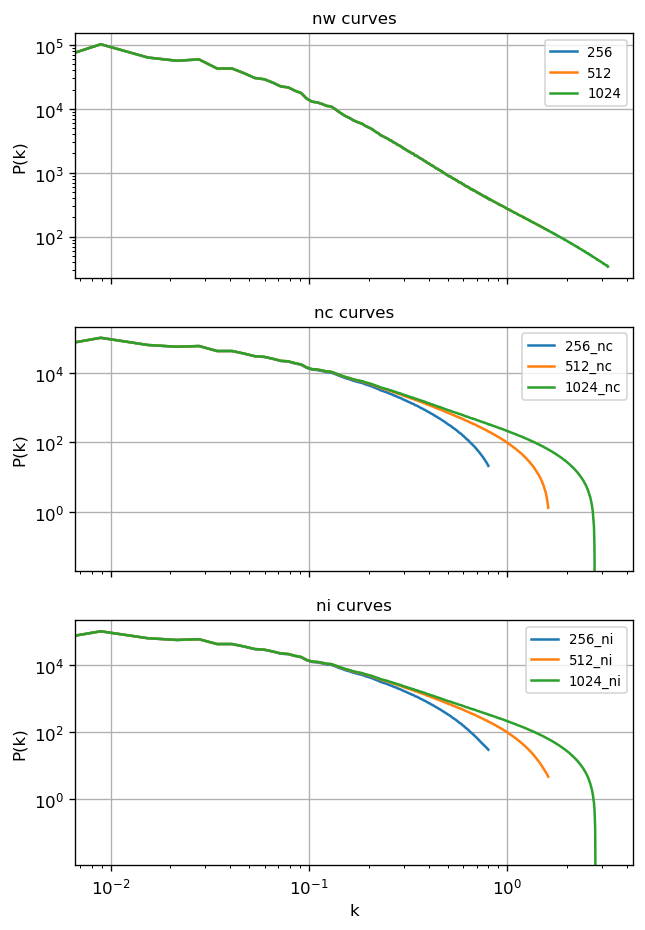

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def key_of(name: str) -> str:
    if '_nc' in name:
        return 'nc'
    if '_ni' in name:
        return 'ni'
    return 'nw'             

groups = {'nw': [], 'nc': [], 'ni': []}
for name, k_arr, P_arr in lines:
    key = key_of(name)
    idx      = np.argmin(np.abs(k_arr - target_k))
    factor   = P_ref_value / P_arr[idx]
    P_aligned = P_arr * factor
    groups[key].append((name, k_arr, P_aligned))


fig, axes = plt.subplots(3, 1, figsize=(6, 9), sharex=True, dpi=120)
order   = ['nw', 'nc', 'ni']      
# markers = {'nw': '|', 'nc': 'x', 'ni': '+'}
# colors  = plt.get_cmap('tab10').colors

for ax, key in zip(axes, order):
    for j, (name, k_arr, P_aligned) in enumerate(groups[key]):
        ax.loglog(k_arr, P_aligned,
                #   lw=1,
                #   color=colors[j % len(colors)],
                  label=name)
    ax.set_ylabel('P(k)')
    ax.set_title(f'{key} curves', fontsize=10)
    ax.grid()
    ax.legend(fontsize=8)

axes[-1].set_xlabel('k')
plt.show()
